## Projeto com Feedback 4
## Customer Churn em uma Operadora de Telecom
## MARCIO DE LIMA
##
## DICIONARIO DE DADOS - data/projeto4_telecom_treino.csv

Unnamed: 0                         int64
state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object    => VARIAVEL TARGET


##

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
# Importando o arquivo 
df = pd.read_csv('data/projeto4_telecom_treino.csv')

In [3]:
df.head(10)

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
5,6,AL,118,area_code_510,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,no
6,7,MA,121,area_code_510,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
7,8,MO,147,area_code_415,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no
8,9,LA,117,area_code_408,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,no
9,10,WV,141,area_code_415,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,no


In [4]:
df.dtypes

Unnamed: 0                         int64
state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [5]:
#Dados estatisticos - analise descritiva
df.describe()

,Unnamed: 0,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3333.00000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,1667.00000,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,962.29855,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,834.00000,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,1667.00000,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,2500.00000,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,3333.00000,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
#Tratamento dos dados NA - Missing
df.fillna(0)

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
5,6,AL,118,area_code_510,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,no
6,7,MA,121,area_code_510,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
7,8,MO,147,area_code_415,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no
8,9,LA,117,area_code_408,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,no
9,10,WV,141,area_code_415,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,no


In [7]:
#Tratamento e Transformação das colunas do DataFrame 

# remoção da coluna Unnamed: 0
df = df.drop('Unnamed: 0', axis=1)

#Colunas international_plan, voice_mail_plan, churn, 
df['churn'] = df['churn'].map(lambda x: 1 if x == 'yes' else 0 )
df['voice_mail_plan'] = df['voice_mail_plan'].map(lambda x: 1 if x == 'yes' else 0 )
df['international_plan'] = df['international_plan'].map(lambda x: 1 if x == 'yes' else 0 )

# Coluna area_code
df['area_code'] =  df['area_code'].map(lambda x: x.replace('area_code_','')) 


In [21]:
#Transformando o tipo das colunas
df['area_code'] = df['area_code'].apply(pd.to_numeric, downcast='integer')
df['voice_mail_plan'] = df['voice_mail_plan'].apply(pd.to_numeric, downcast='integer')
df['international_plan'] = df['international_plan'].apply(pd.to_numeric, downcast='integer')
df['churn'] = df['churn'].apply(pd.to_numeric, downcast='integer')

df.dtypes

state                             object
account_length                     int64
area_code                          int64
international_plan                 int64
voice_mail_plan                    int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                              int64
dtype: object

In [47]:
df.shape

(3333, 20)

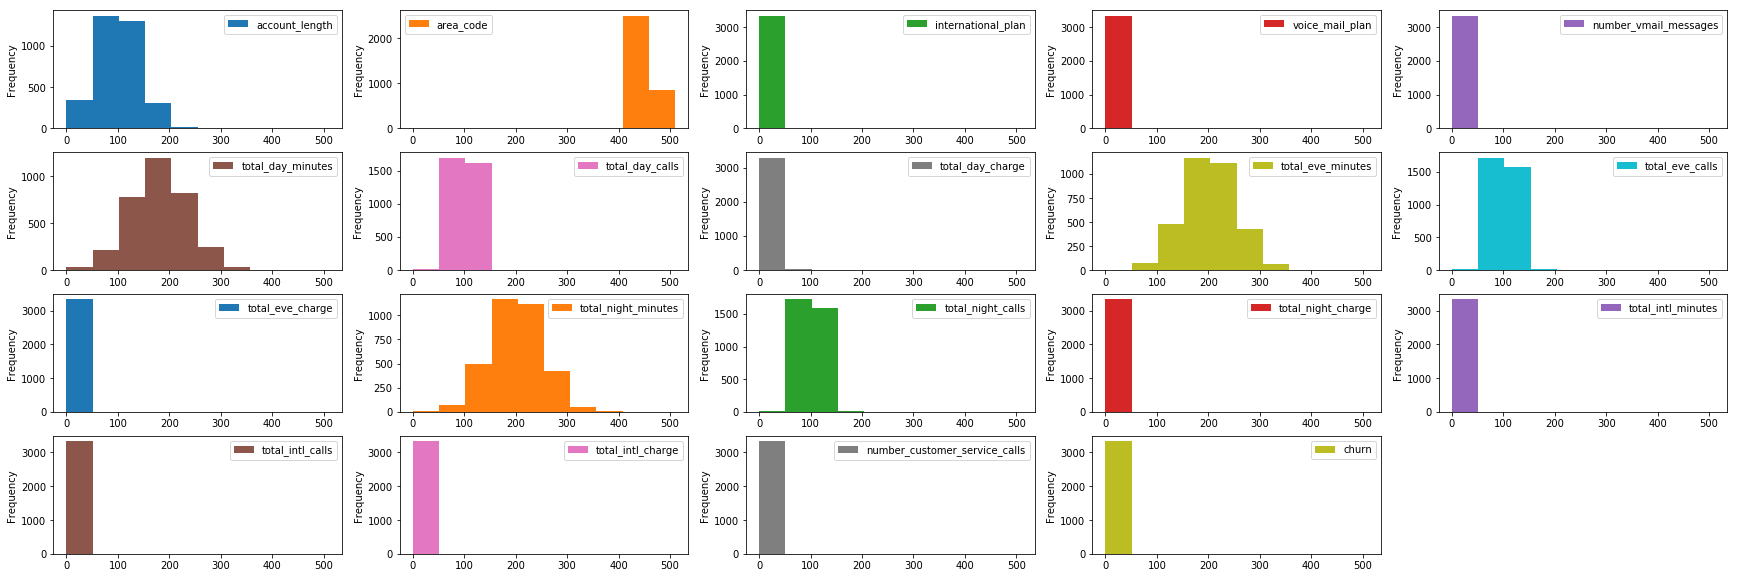

In [45]:
#Gerando gráficos para analise das variaveis

#Histogramas
df.plot(kind = 'hist', subplots = True, layout = (4,5), sharex = False, figsize=(30,10))
plt.show()

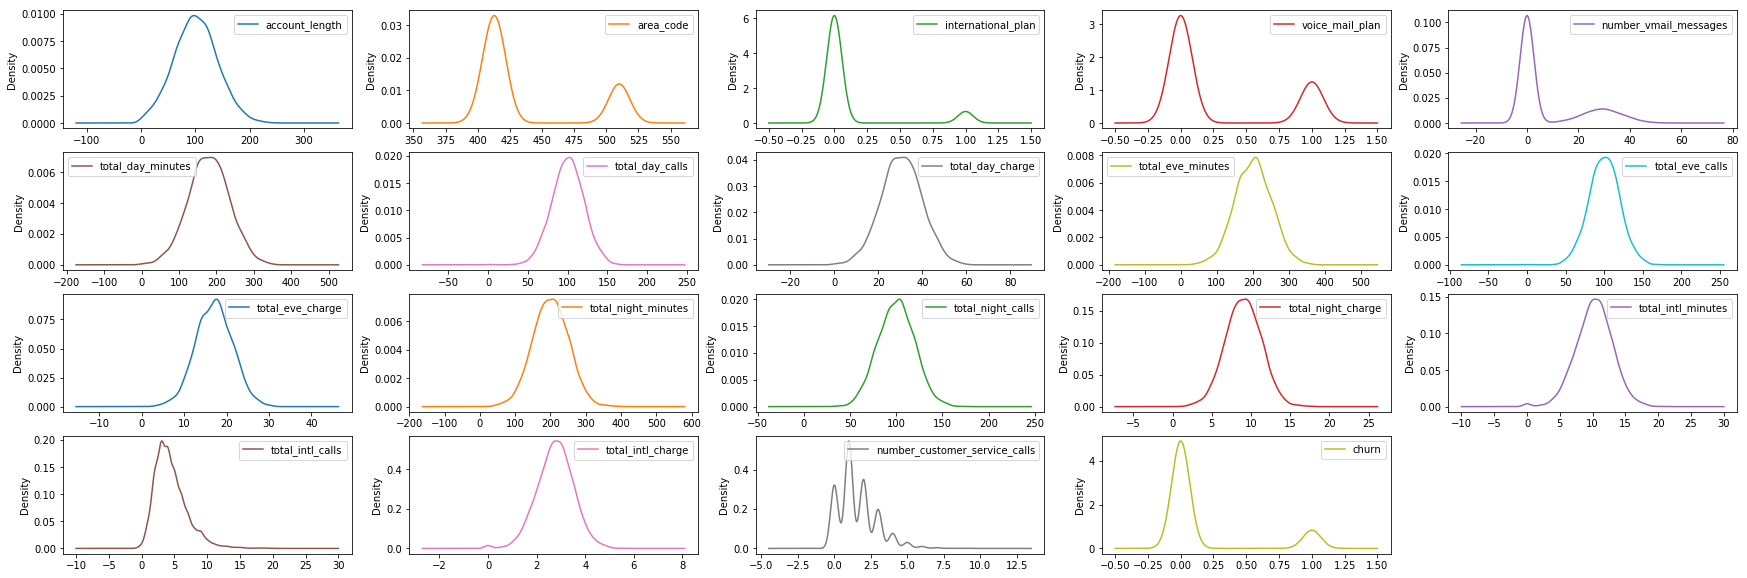

In [43]:
#Gráfico de Densidade
df.plot(kind = 'density', subplots = True, layout = (4,5), sharex = False, figsize=(30,10))
plt.show()

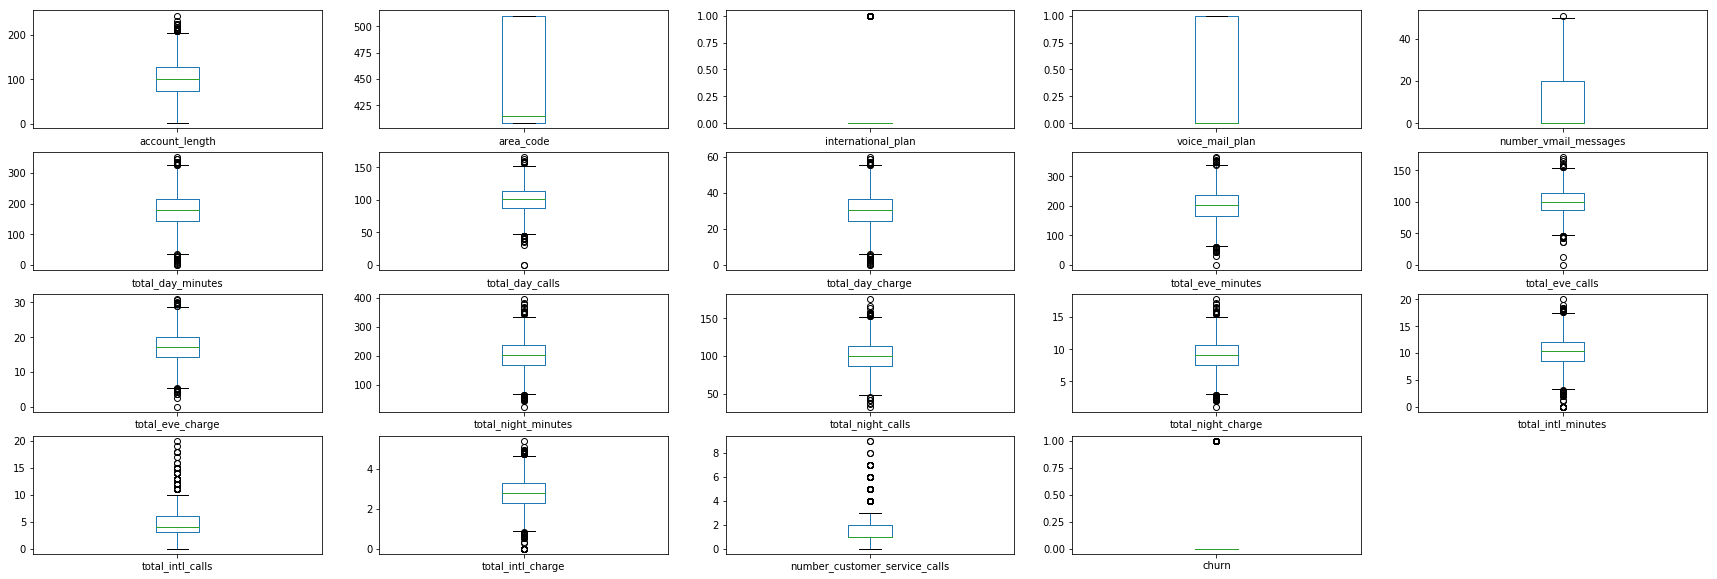

In [42]:
#Box-Plots
df.plot(kind = 'box', subplots = True, layout = (4,5), sharex = False, sharey = False, figsize=(30,10))
plt.show()

In [46]:
#Dados de Correlação entre as variáveis
df.corr()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
account_length,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area_code,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
international_plan,0.024735,0.048551,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
voice_mail_plan,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
number_vmail_messages,-0.004628,-0.001994,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total_day_minutes,0.006216,-0.008264,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total_day_calls,0.038470,-0.009646,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total_day_charge,0.006214,-0.008264,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total_eve_minutes,-0.006757,0.003580,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total_eve_calls,0.019260,-0.011886,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233


In [23]:
# Distribuição da varíavel TARGET
df.groupby('churn').size()

churn
0    2850
1     483
dtype: int64

In [91]:
# Separando os dados
array = df.values
colunas = df.columns[1:19]

# Separando o array em componentes de input (X) e output (Y)
X = array[:,1:19]
Y = array[:,19]


In [75]:
# Normalizando e padronizando os dados do dataframe

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Gerando a nova escala (normalizando os dados)
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)

#Gerando padronização dos valores
scalerP = StandardScaler().fit(rescaledX)
standardX = scalerP.transform(rescaledX)


In [107]:
#Montando novo DataFrame com State, Churn e as colunas normalizadas na escala e Padronizadas
df_new = pd.DataFrame (data=standardX, columns=colunas)
df_new['state'] = df['state']
df_new['churn'] = df['churn']

df_new.head(10)

array1 = df_new.values
X1 = array1[:,0:18]
Y1 = array1[:,19]
Y1 = Y1.astype(int)


In [108]:
#Gerando dados de Treino e de Teste para os modelos
from sklearn.model_selection import train_test_split

seed = 1313
X_treino, X_teste, y_treino, y_teste = train_test_split(X1, Y1, test_size = 0.30, random_state = seed)


In [109]:
y_treino

array([0, 0, 0, ..., 0, 0, 0])

In [110]:
# Feature selection com Random Forest
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import SelectFromModel

clf = RandomForestClassifier(random_state=seed)
selector = clf.fit(X_treino, y_treino)
fs = SelectFromModel(selector, prefit=True)

X_treino_new = fs.transform(X_treino)
X_teste_new = fs.transform(X_teste)

print(X_treino_new.shape, X_teste_new.shape)

(2333, 6) (1000, 6)


In [111]:
#Criando o Modelo - Versao 1
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()

In [112]:
# Treinamento do modelo
modelo.fit(X_treino_new, y_treino)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [113]:
#Resultado do Modelo - Versao 1
resultado = modelo.score(X_teste_new, y_teste)
print("Acurácia nos Dados de Teste: %.3f%%" % (resultado * 100.0))

Acurácia nos Dados de Teste: 84.200%


In [119]:
#Criando o modelo 2 - XGBClassifier
#!pip install xgboost
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

modelo2 = XGBClassifier(n_estimators=110, nthread=-1, seed=seed)

# Treinando o modelo
modelo2.fit(X_treino_new, y_treino, eval_metric="auc", verbose = False)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=110, n_jobs=1, nthread=-1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=1313, silent=None, subsample=1, verbosity=1)

In [120]:
# Fazendo previsões
y_pred = modelo2.predict(X_teste_new)
previsoes = [round(value) for value in y_pred]


In [121]:
#Resultado do Modelo - Versao 2
resultado2 = accuracy_score(y_teste, previsoes)
print("Acuracia do Modelo 2: %.3f" % (resultado2 * 100.0))

Acuracia do Modelo 2: 90.000


## FIM
## OBRIGADO
